In [ ]:
#Bazı gerekli olan kütüphanelerimiz var.
#Dense katmanları full connected katmanlar.Sequential'ı bir stack gibi düşünebiliriz.
#Eklediğimiz katmanların hepsini bunun içerisine sırasıyla atmak zorundayız.
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Delimeter: Ayırıcı.Virgüllerle ayrıldığını belirtiyoruz.
dataset=loadtxt('pima-indians-diabetes.csv',delimiter=',')
#dataset dersek veriyi getirir.
dataset.shape # ile boyutunu görüyoruz.Veri seti içerisinde 768 adet satır var.Her satır bir kaydı temsil ede.r
#768 adet veri var. Her bir satır 9 adet sütundan oluşuyor.Sütunlar yaş,insulin miktarı,kitle endeksi,çıktı vs.

#Bu dataset içerisinde girdiler ve çıktılar aynı yerde bunları birbirinden ayırmamız lazım.
#Girdileri X olarak belirleyelim.9 tane sütun var. 1 tanesi outcome.Geriye kalan veri.O yüzden 8 girdimiz olmalı.
#0'dan ilk 8'e kadar olanı yani ilk 8 tanesini girdi olarak alır.
X=dataset[:,0:8]

#Başlangıçtan 8'e kadar olanıda outcome olarak alıyoruz.
y=dataset[:,8]

#Veriyi aldık.Artık bu veriyle modelimizi eğitmemiz gerekiyor.

In [ ]:
#Veri setini yüklemeden önce bir model nasıl tanımlanır,bir yapay sinir ağı nasıl tanımlanır.
#İlk olarak multilayer perceptron diyelim.Çok katmanlı bir yapay sinir ağı oluşturmak istiyoruz.

#Sequential sınıfından bir nesne oluşturalım.
# mlp = Sequential()

#Sonra bu nesnenin içerisine katmanlar ekliyoruz.
#Dense katmanını ekliyoruz yani tam bağımlı bir katman.
#3 girdisi,12 tane ara katman,8 tane ikinci ara katman bir tanede çıktısı olan bir model tasarlayalım.
#Dense'in ilk parametresi,ilk hidden katmanımızın nöron sayısını veriyoruz:12
#İkinci parametre olarak bir input dimension istiyor.Yani ilk hidden katmanına kaç adet veri gelecek.
#input_dim=3 yani 3 tane girdimiz olacak.
#3.parametre olarak,her dense katmanının bir aktivasyon fonksiyonu olması lazım.Relu seçelim.Sigmoid ya da tanjant h'da kullanabiliriz.
#Problem türüne göre değişir.
#İlk katmanı ekledik.Girdi katmanıyla 1.hidden katmanı tek bir dense'te birleştirmiş olduk.

# mlp.add(Dense(12,input_dim=3,activation='relu'))

#İkinci katmanımızı ekleyelim.
#Yine ilk olarak ikinci katmandaki nöron sayısını vermemiz lazım:8
#Her dense katmanında bir aktivasyon fonksiyonu belirtmemiz gerekiyor.
#Tanımladığımız yapay sinir ağı 3 girdisi olsun,1 tane 12'lik 1.hidden katmanı,Sonra 8'lik 2.hidden katmanı,sonra tek bir çıkışı olan
#bir yapıdan bahsetmiştik.

# mlp.add(Dense(4,activation='relu'))

#Birde çıktı katmanını ekleyelim.Çıktı katmanımız 1 tane nörondan oluşuyosa ve aktivasyon fonksiyonumuz
#sigmoid ise bu "ikili sınıflandırmadır".Eğer çıktı 0.5'in üstündeyse 1 altındaysa 0 olacak şekilde bir çıktı verecek.

# mlp.add(Dense(1,activation='sigmoid'))

#mlp.summary diyerek bunun bir özetini alabiliriz.Yapay sinir ağını oluşturmuş olduk.

# mlp.summary()

#ilk satırda 12 tane nörondan bahsediyor.48 tane parametre var.
#Sonrasında 8 nöron 104 parametre, sonrasında 1 nöron 9 parametre varmış.
#Toplamda 161 parametre yani eğitilebilir ağırlık olduğundan bahsediyor.

#48 nereden geliyor:İlk dense katmanımıza girdi 3 tane.
#Her bir girdinin her bir dense'e bağlantısı olduğunu biliyoruz. 3x12 = 36 yapar.
#Birde biası eklersek 12 tane bias + 36 = 48.

#Sonrasında ara katmandaki 104 değeri nerden geliyor: 12*8 tane ağırlığımız var.
#8 tanede bias olduğunu var sayarsak 96+8 = 104 yapar.
#Sondaki parametre sayısına bakacak olursak 8*1=8 bir de bias var 8+1 = 9
#Bunların hepsini topladığımızda modelimizin eğitilebilir ağırlık sayısını bulmuş oluyoruz.

#Dense tanımlarken bu katmanda bias kullanmayacağım diyebiliriz.
#use bias default olarak true.
#Girdiyle 1.hidden katmanı arasında bias kullanmak istemiyorum demektir.
#Bunun sonucunda 48 gelen ilk parametre değeri 12 tane düşüp 36 göstericek.
#mlp.add(Dense(12,input_dim=3,activation='relu',use_bias=False))

#8 olan 2.katmanı 4 yapalım.
#mlp.add(Dense(4,activation='relu'))

#Birden fazla model eklemek istiyosak;
# mlp.add(Dense(8,activation='relu'))
# mlp.add(Dense(64,activation='relu'))
# mlp.add(Dense(16,activation='relu'))


#Değerlerimizi değiştirelim:
#Girdi katmanı, 2 tane hidden 1 tanede çıktı katmanı:Toplamda 4 katmanlı bir model oluşturmuş gibi düşünelim.
# mlp.add(Dense(16,input_dim=3,activation='relu')) #İnput + Hidden 1 layer. Bu ikisini içinde barındırıyor
#Çünkü input dimensionu: 3 verdik: 3'lü giriş olacak. Ve 16'ya bağlanacak şekilde düşünebiliriz.

# mlp.add(Dense(8,activation='relu')) #hidden 2-Gizli katman.

#Sigmoid çıktı fonksiyonu: Burası output katmanıdır.
# mlp.add(Dense(1,activation='sigmoid'))
# mlp.summary()

#Bu işlemden sonra modelimizi derlememiz lazım.Yani her yapıcağımız iş için bu geçerli.

In [ ]:
#Geçen hafta bahsettiğimiz: Problem türlerine göre optimazor'u belirleyeceğiz.
#Loss fonksiyonunu belirleyeceğiz gibi durumlar var.
#Problem türü bir loss fonksiyonu belirlemek istiyoruz.Bunun ikili sınıflandırma problemi olduğunu söylemiştik.
#İkili sınıflandırma problemi için kullanacağımız loss fonksiyonu binary cross entropy.

#ikinci parametre olarak bir optimazer istiyor.Yani loss fonksiyonunu hangi algoritma ile optimize edeğiz.
#Stochastic gradient descent kullanalım yani 'sgd'. Adamda var.

#Birde eğitim sırasında hangi metriği izlemek istiyoruz.Birden fazla metric kullanabiliriz.
#Accuracy'yi izlemek isteyelim.

# mlp.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

#Modelimizi derledik. Bu aşamadan sonra artık modelimiz eğitime hazır.
#Basit bir verisetimiz var.Bir diabet veri seti.


In [ ]:
#Buradan itibaren veriyle çalışacağımız için yeniden giriyoruz.
mlp = Sequential()
mlp.add(Dense(64,input_dim=8,activation='relu'))     #input + hidden layer
mlp.add(Dense(128,activation='relu'))                 #hidden 2 layer
mlp.add(Dense(128,activation='relu'))
mlp.add(Dense(64,activation='relu'))
mlp.add(Dense(1,activation='sigmoid'))              #outuput layer

#input dimensionu 3 vermiştik.Bu problemde 8 tane girdimiz olduğu için 8 yapacağız.


#Modeli geliştirmek için bir katman daha ekleyelim.Hidden katman sayısının derinliğini artıralım.
# mlp.add(Dense(128,activation='relu'))
# mlp.add(Dense(128,activation='relu'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,729
Trainable params: 33,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Artık modelimizi eğitmeye hazırız.
#Fit dediğimizde girdileri istiyor yani X'i.Çıktıları istiyor Y. Epoch veriyoruz.
#Batch size veriyoruz.
mlp.fit(X,y,epochs=50,batch_size=10)

#Modelimizi eğitmiş olduk.
#Elde ettiğimiz accuracy
#Veriyi hiç bölmedik.Eğittiğimi veriyle kendini test ediyor.
#Bir epochta neler oluyodu. Toplamda 768 tane verimiz var.Bir epochta 768 tane veriyitek tek gönderiyor.
#Forward yani ileri yayılım yapıyor.Burada total hatayı,olması gereken değerden çıkartıp buluyor.
#Sonrasında bu total hatayı geriye yayıyor. Ağırlıkları güncelliyor ve eğitmek için kullandığımız x,y ile
#sistemi test ediyor ve bir accuracy elde ediyor.
#Eğitmiş olduğumuz veriyle test edersek ezberler.O yüzden veriyi bölmemiz lazım.Train verisiyle veriyi eğitelim
#test verisiylede veriyi test edebilelim.

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 0.9130 - accuracy: 0.5990
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7975 - accuracy: 0.6081
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6758
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6758
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6419
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.6771
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.7018
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6875
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6771
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7018
Epoch 11/50
77/77 [

In [ ]:
#Veriyi test işlemini yapalım.
_,accuracy=mlp.evaluate(X,y)

print("Accuracy:",accuracy)
#Test sonucu az önceki epochlardan yüksek çıktı.

24/24 [==============================] - 0s 970us/step - loss: 0.3958 - accuracy: 0.8008
Accuracy: 0.80078125


In [ ]:
#Bir örnek için modeli predict ettirelim.
predictions = (mlp.predict(X) > 0.5).astype(int)
#predictions

#Bu tahminleri belli bir kriterler aralığında değerlendirmemiz lazım.
#0.5'ten büyük olanları 1 olarak etiketleyecek.Küçük olanlarıda 0.

#İlk 5 örneğin tahminlerini ve değerlerini vermeye çalışalım.
#predictions[i] modelimizin tahmini. y[i] ise olması gereken değer.
for i in range(5):
  print(X[i].tolist(),predictions[i],y[i])




24/24 [==============================] - 0s 791us/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] [1] 1.0
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] [0] 0.0
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] [1] 1.0
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] [0] 0.0
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] [1] 1.0


In [ ]:
#Eğittiğimiz veriyle modeli test edersek modelin ne kadar iyi öğrendiğini anlayamayız.
#Yaptığımız bütün işlemleri verileri, modeli eğittiğimiz veri üzerinde test ettik.Amacımız veriyi bölmek.
#Veriyi=> Train,validation ve test ya da train ve test olarak veriyi bölmemiz gerekir.

#Bu iş için sklearn içerisinde model selection diye bir yapı var.Bu fonksiyonu veriyi bölmek için kullanacağız.

from sklearn.model_selection import train_test_split

#Eğitim için X girdiler, test için x girdiler, eğitim için çıktılar, test için çıktılar.
#Fonksiyon bazı parametreler istiyor.1.si böleceğimiz veri, 2.si böleceğimiz verinin etiketleri.
#3.süde test size. Bu verinin % kaçını test için ayıracağız.Birde random state diye bir parametresi var.
#Random state değerine göre bölme işlemi yapıyor.Bu,kodu her çalıştırdığımızda;
#aynı veri grubunu teste,aynı veri grubunu eğitime atıyor. Bunu yapmazsak ne olur?
#Model eğitiyoruz,parametrelerini optimize etmeye çalışıyoruz.
#Her seferinde farklı farklı test gruplarına bölerse parametreleri düzgün şekilde optimize edemeyiz.
#O zaman bu veriyi başlangıçta her böldüğümüze aynı test grubuna ve eğitim grubuna bölmesi lazım.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=18)

#X train boyutu 768 di.614 oldu.
X_train.shape

#X test boyutuda 154 oldu.
X_test.shape

#Birde yapay sinir ağlarını eğitirken validation datasına ihtiyacımız var.
#Validation datası ne işe yarıyor?
#Bir epochta neler oluyodu.Eğitmek için kullandığımız 768 tane veri tek tek forward edilerek
#ileri yayılımla gidiyordu, olması gereken değerle modelin tahmini hesaplanıyodu ve toplam
#hata elde ediliyodu.Bu toplam hata geri yayılarak ağırlıklar güncelleniyor sonra sistem
#eğitim yaptığımız veriyle test ediliyordu ve sonuç yazılıyordu.

#Burada şöyle bir sorun var.Model ezberleyebilir.Sisteme biz hiç görmediği bir veri üzerinde
#doğrulama yapmamız lazım.Yani modelin doğru öğrenip öğrenemediğini anlamak için burada bir
#validation yani doğrulama verisi.Modelin daha önce test verisinden ayrı olarak modelin daha
#önce hiç görmediği bir veri seti kullanmamız lazım.Ayırmamız gerekiyor.

#Validationu ayırmanın 2 tane yolu var.
#Validasyon verisi,test verisi az olduğu için,eğitim verisinden ayrılır.
#Önceki adımda test verisini tüm X ve y'lerden seçip ayırmıştık.Burada validasyon verisini
#x_train ve y_trainlerden seçip ayırdık.

# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state=18)


(154, 8)

In [ ]:
#Validasyon verisini modele vereceğiz.(İlk yöntem)
#mlp.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)


#Validation split parametresi var.Bu parametreyi kullanarak validasyon verisini ayarlayabiliriz.
#Eğitim verisinin 0.1'ini validasyon verisi olarak kullanacağız demektir.
history=mlp.fit(X_train,y_train,validation_split=0.1,epochs=25)

#X train içindeki veriyi gösterdik.Loss yani toplam hata hesaplandı.Elde ettiğimiz X_train verisiyle sistemi test ettik.
#Sonrasında validation datamızla sistemi test ediyoruz.val_accuracy doğrulama verisinin sonucu.
#Bir de test verimiz var.Model görmediği veri üzerinde çokta fazla düzgün sonuçlar üretemiyor.

Epoch 1/25
18/18 [==============================] - 1s 30ms/step - loss: 0.4715 - accuracy: 0.7681 - val_loss: 0.4346 - val_accuracy: 0.8387
Epoch 2/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4263 - accuracy: 0.7989 - val_loss: 0.4171 - val_accuracy: 0.8065
Epoch 3/25
18/18 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8007 - val_loss: 0.4318 - val_accuracy: 0.8065
Epoch 4/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4065 - accuracy: 0.8043 - val_loss: 0.4566 - val_accuracy: 0.7903
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 0.4033 - accuracy: 0.8062 - val_loss: 0.4408 - val_accuracy: 0.8065
Epoch 6/25
18/18 [==============================] - 0s 7ms/step - loss: 0.3929 - accuracy: 0.8170 - val_loss: 0.4547 - val_accuracy: 0.8065
Epoch 7/25
18/18 [==============================] - 0s 7ms/step - loss: 0.3980 - accuracy: 0.8080 - val_loss: 0.4624 - val_accuracy: 0.7903
Epoch 8/25
18/18 

In [ ]:
#Önce x_train ve y_train verileriyle değerlendirme yapsın.
#Score'un 0'ında lossu var 1'inde accuracy var.100*accuracy bir sonuç verir.

scores=mlp.evaluate(X_train,y_train)
print("Training Accuracy:",scores[1]*100)

#Bu eğitim için elde ettiğimizdi.Bir de test için bir sonuç lazım.

scores=mlp.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)

#Training ve test accuracy birbirine yakınken,validation accury'si daha düşüktü.
#Rastgele bir veriyi böldüğümüzden dolayı test verisi, validation verisine göre daha kolay
#olabilir.Bu yüzden validation accurrysine göre daha iyi sonuçlar elde etmiş olabiliriz.

#Birde x val deneyelim.
# scores=mlp.evaluate(X_val,y_val)
# print("Validation Accuracy:",scores[1]*100)


#Doğrulama ve test arasındaki fark:Doğrulama verisi eğitim esnasında kullanılır.Eğitimin
#nasıl gittiğini, modelin öğrenip öğrenmediğini belirlemek için accuracy loss gibi
#parametreleri inceleyerek kullanırız.
#Test verisi ise modelin eğitimi bittikten sonra modeli değerlendirmek için kullanırız.
#Doğrulama verisini: Bakıyoruz modelimiz bir yerde ezberlemiş,iyi sonuçlar elde etmemiş.
#Model hiperparametre denilen parametrelerimiz var: Öğrenme katsayısı,dense katmanlarındaki
#nöron sayısı,dense katman sayısı. Katman sayılarını bu gibi parametreleri validasyon verisine
#bakarak,validasyon verisiyle yaptığımız eğitime bakarak ayarlarız.Ve en son validasyon verisinde
#iyi sonuçlar varsa, accuracy ile validasyon verisi arasındaki fark az ise en son bu model
#görmediği validasyon verisi üzerinde düzgün sonuçlar elde ediyor, bu modele görmediği başka
#veri göstereyim. Eğitim bittikten sonra 50 epoch sonunda bir test verisi göstereyim ve
#bu test verisine göre bir sonuç üretsin deriz.
#Birini eğitim esnasında modelimizin hiperparametrelerini optimize etmek için kullanırız.
#Diğerini modelimizin eğitimi bittiğinde kullanırız.


#Üstteki random stateleri değiştirip 18 yaparak başka bir veri bölme işlemi yapalım.

#Verinin böyle küçük olduğu yapılarda cross validation yapısını kullanırsak daha doğru sonuçlar
#elde edebiliriz.

#Başka bir validasyon verisi bölme yöntemi görelim.
## X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state=18) Bunu siliyoruz.


#Train accuracy ve test accuracy arasındaki fark  çoksa model iyi öğrenmemiş ezberlemiş demektir.
#%10'luk bir fark ezberlemiş gibi gözüküyor.

20/20 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8502
Training Accuracy: 85.01628637313843
5/5 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7273
Test Accuracy: 72.72727489471436


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


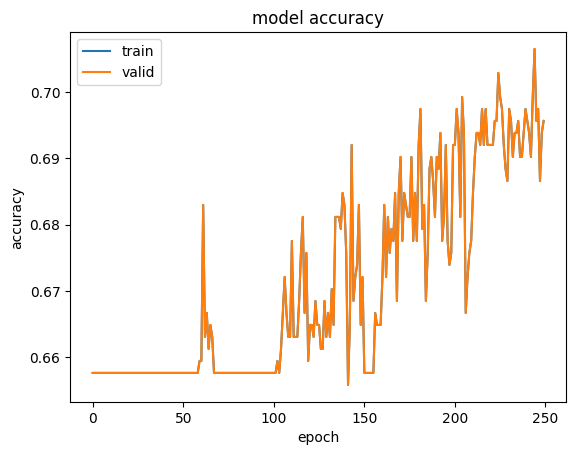

<function matplotlib.pyplot.show(close=None, block=None)>

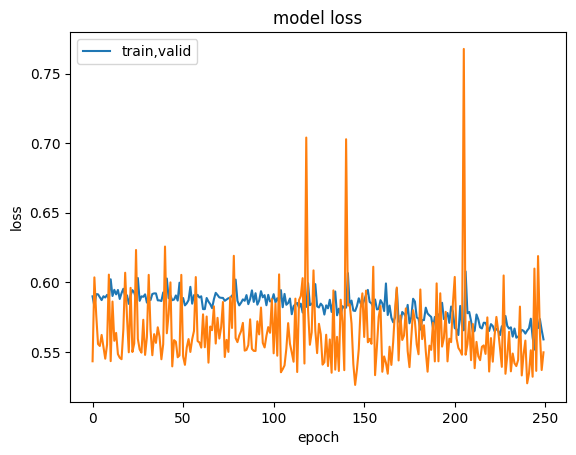

In [ ]:
import matplotlib.pyplot as plt

#Bunların grafiklerini çizdirebiliriz.Bunun için eğitimdeki verileri tutmamız lazım.
#Bunun için verileri sözlüğe döndürelim adınıda history koyalım.

print(history.history.keys())

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,valid'],loc='upper left')
plt.show

#Sarı validasyon accuracy'si, mavide train accuracy
#Beklediğimiz şey lossun epochlar boyunca düşmesi ve accuracy'nin artması.

#İlk başta verdiğimiz dense içindeki hiperparametrelerle oynayalım.
#Dense'e verdiğimiz 16-8'i 64 64 yapalım.

In [ ]:
#Modeli büyüttüğümüz zaman sonuçta test accuracy ile validation accuracy arasındaki fark %10'dan fazla.
#Modelimiz ezberlemiş gibi gözüküyor.
#Belirlememiz gereken bazı hiperparametreler var.Modelin optimizerini değiştirebiliriz.
#sgd kullanmıştık adam yapabiliriz.
#Adam yaptığımızda training loss düşerken validasyon lossun yerinde saydığını görüyoruz.
#Birinde düşme varken diğerinde yoksa problem anlamına gelir.
#Train accuracy yüksekken validation accuracy düşükse yine problem demektir.

#Grafiğe baktığımızda, traninig acuracy sürekli artarken validation accuracy azalmış.
#Training loss azalırken validation loss artmış.
#Bunlar istediğimiz eğitimler değil.Bizim istediğimiz şey bu eğitim esnasında validation accuracy ile
#tranining accuracy'nin birbirine yakın olması.
#Validation lossla train lossun birbirine yakın olmasını isteriz.

#Neyi değiştirirsek ne olur diye çalışabiliriz.